In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

### **Loading in the Datasets**

In [47]:
mitbih_test = pd.read_csv('mitbih_test.csv', header= None)
mitbih_train = pd.read_csv('mitbih_train.csv', header = None)

### **Renaming the labels column, making the train and test into datasets**

In [48]:
mitbih_test.info()
mitbih_test = mitbih_test.rename(columns={'187': 'labels'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [49]:
mitbih_train.info()
mitbih_train = mitbih_train.rename(columns={'187': 'labels'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [50]:
df_test = pd.DataFrame(mitbih_test)
df_test = df_test.rename(columns ={187 : 'label'})

In [51]:
df_train = pd.DataFrame(mitbih_train)
df_train = df_train.rename(columns ={187 : 'label'})
df_train
df_train.label.unique()

array([0., 1., 2., 3., 4.])

### **Counting number of each type of rhythms in the train dataset + visualizing the number**

In [52]:
print("This is 0 (Normal Heart Rhythms):", df_train['label'].value_counts()[0])
print("This is 1 (Supraventricular Arrhythmias):", df_train['label'].value_counts()[1])
print("This is 2 (Ventricular Arrhythmias):", df_train['label'].value_counts()[2])
print("This is 3 (Fusion Beats):", df_train['label'].value_counts()[3])
print("This is 4 (Unknown or Unclassified heartbeats):", df_train['label'].value_counts()[4])

This is 0 (Normal Heart Rhythms): 72471
This is 1 (Supraventricular Arrhythmias): 2223
This is 2 (Ventricular Arrhythmias): 5788
This is 3 (Fusion Beats): 641
This is 4 (Unknown or Unclassified heartbeats): 6431


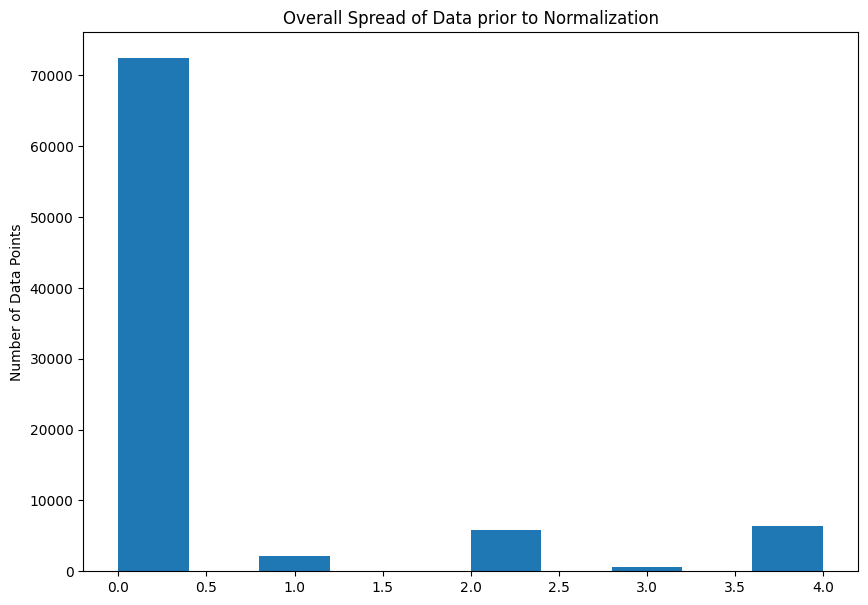

In [53]:
plt.figure(figsize=(10, 7))
plt.title("Overall Spread of Data prior to Normalization")
plt.ylabel("Number of Data Points")
plt.hist(df_train['label'])
plt.show()

### **Normalizing the train dataset**

In [54]:
df_zero = df_train[df_train['label'] == 0]
df_one = df_train[df_train['label'] == 1]
df_two = df_train[df_train['label'] == 2]
df_three = df_train[df_train['label'] == 3]
df_four = df_train[df_train['label'] == 4]

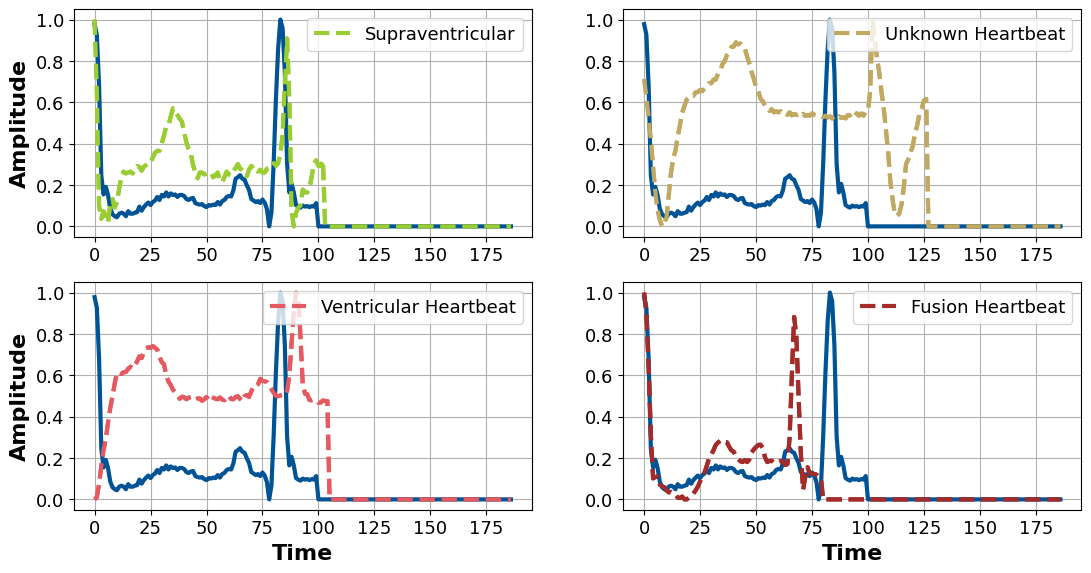

In [55]:
plt.figure(figsize=(13, 6.5))

fontsizelabels = 16
fontsizeticks = 13
fontsizelegend = 13

plt.subplot(2, 2, 1)
plt.plot(df_one.iloc[0, :187], color='yellowgreen', label='Supraventricular', linestyle='dashed',linewidth=3)
plt.legend(fontsize=fontsizelegend)
plt.plot(df_zero.iloc[0, :187], color='#005394', label='Normal Heartbeat',linewidth=3)
plt.plot(df_one.iloc[0, :187], color='yellowgreen', label='Supraventricular', linestyle='dashed',linewidth=3)
plt.ylabel('Amplitude', fontsize = fontsizelabels, fontweight = 'bold')
plt.xticks(fontsize = fontsizeticks)
plt.yticks(fontsize = fontsizeticks)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df_four.iloc[0, :187], color='#c1a961', label='Unknown Heartbeat', linestyle='dashed',linewidth=3)
plt.legend(fontsize=fontsizelegend)
plt.plot(df_zero.iloc[0, :187], color='#005394', label='Normal Heartbeat',linewidth=3)
plt.plot(df_four.iloc[0, :187], color='#c1a961', label='Unknown Heartbeat', linestyle='dashed',linewidth=3)
plt.xticks(fontsize = fontsizeticks)
plt.yticks(fontsize = fontsizeticks)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df_two.iloc[0, :187], color='#e55a60', label='Ventricular Heartbeat', linestyle='dashed',linewidth=3)
plt.legend(fontsize=fontsizelegend)
plt.plot(df_zero.iloc[0, :187], color='#005394', label='Normal Heartbeat',linewidth=3)
plt.plot(df_two.iloc[0, :187], color='#e55a60', label='Ventricular Heartbeat', linestyle='dashed',linewidth=3)
plt.xlabel('Time', fontsize = fontsizelabels, fontweight = 'bold')
plt.ylabel('Amplitude', fontsize = fontsizelabels, fontweight = 'bold')
plt.xticks(fontsize = fontsizeticks)
plt.yticks(fontsize = fontsizeticks)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df_three.iloc[0, :187], color='brown', label='Fusion Heartbeat', linestyle='dashed',linewidth=3)
plt.legend(fontsize=fontsizelegend)
plt.plot(df_zero.iloc[0, :187], color='#005394', label='Normal Heartbeat',linewidth=3)
plt.plot(df_three.iloc[0, :187], color='brown', label='Fusion Heartbeat', linestyle='dashed',linewidth=3)
plt.xlabel('Time', fontsize = fontsizelabels, fontweight = 'bold')
plt.xticks(fontsize = fontsizeticks)
plt.yticks(fontsize = fontsizeticks)
plt.grid(True)



plt.show()

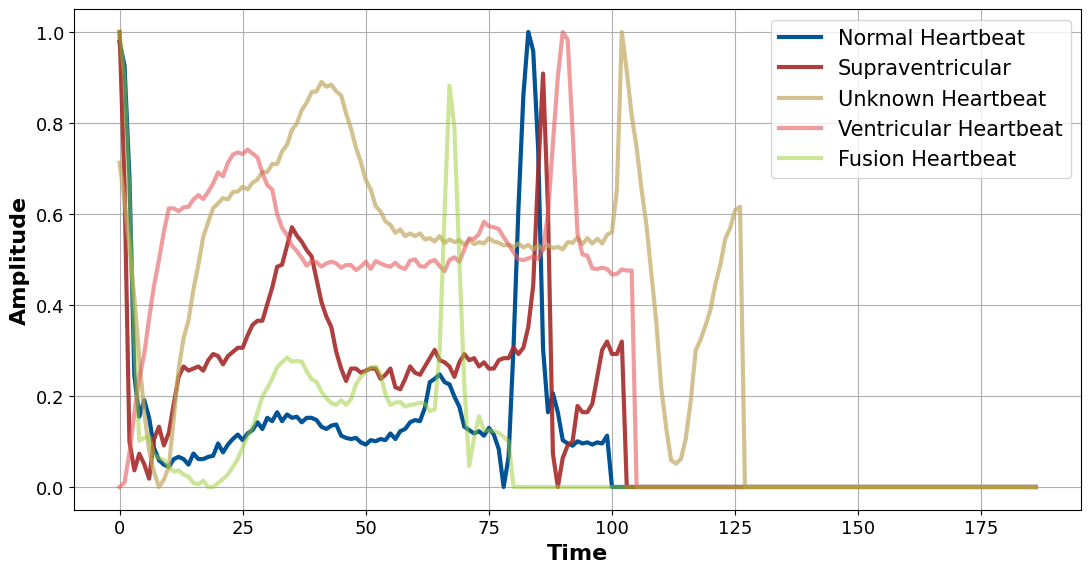

In [56]:
plt.figure(figsize=(13, 6.5))

fontsizelabels = 16
fontsizeticks = 13
fontsizelegend = 15

#plt.subplot(2, 2, 1)
plt.plot(df_zero.iloc[0, :187], color='#005394', label='Normal Heartbeat',linewidth=3, alpha=1)
plt.plot(df_one.iloc[0, :187], color='brown', label='Supraventricular', linewidth=3, alpha=.9)
plt.plot(df_four.iloc[0, :187], color='#c1a961', label='Unknown Heartbeat', linewidth=3, alpha = .7 )
plt.plot(df_two.iloc[0, :187], color='#e55a60', label='Ventricular Heartbeat',linewidth=3, alpha = .6)
plt.plot(df_three.iloc[0, :187], color='yellowgreen', label='Fusion Heartbeat',linewidth=3, alpha = .5)
plt.xlabel('Time', fontsize = fontsizelabels, fontweight = 'bold')
plt.ylabel('Amplitude', fontsize = fontsizelabels, fontweight = 'bold')
plt.xticks(fontsize = fontsizeticks)
plt.yticks(fontsize = fontsizeticks)
plt.grid(True)

plt.legend(fontsize=fontsizelegend)

plt.show()

In [58]:
df_zero = df_zero.sample(n=1200, random_state=1)
df_one = df_one.sample(n=1200, random_state=1)
df_two = df_two.sample(n=1200, random_state=1)
df_four = df_four.sample(n=1200, random_state=1)

df_train_normalized = pd.concat([df_zero, df_one, df_two, df_three, df_four, df_three])


In [59]:
df_train_normalized.info()
df_train_normalized.label.unique()

<class 'pandas.core.frame.DataFrame'>
Index: 6082 entries, 65728 to 81122
Columns: 188 entries, 0 to label
dtypes: float64(188)
memory usage: 8.8 MB


array([0., 1., 2., 3., 4.])

In [60]:
print("This is 0 (Normal Heart Rhythms):", df_train_normalized['label'].value_counts()[0])
print("This is 1 (Supraventricular Arrhythmias):", df_train_normalized['label'].value_counts()[1])
print("This is 2 (Ventricular Arrhythmias):", df_train_normalized['label'].value_counts()[2])
print("This is 3 (Fusion Beats):", df_train_normalized['label'].value_counts()[3])
print("This is 4 (Unknown or Unclassified heartbeats):", df_train_normalized['label'].value_counts()[4])

This is 0 (Normal Heart Rhythms): 1200
This is 1 (Supraventricular Arrhythmias): 1200
This is 2 (Ventricular Arrhythmias): 1200
This is 3 (Fusion Beats): 1282
This is 4 (Unknown or Unclassified heartbeats): 1200


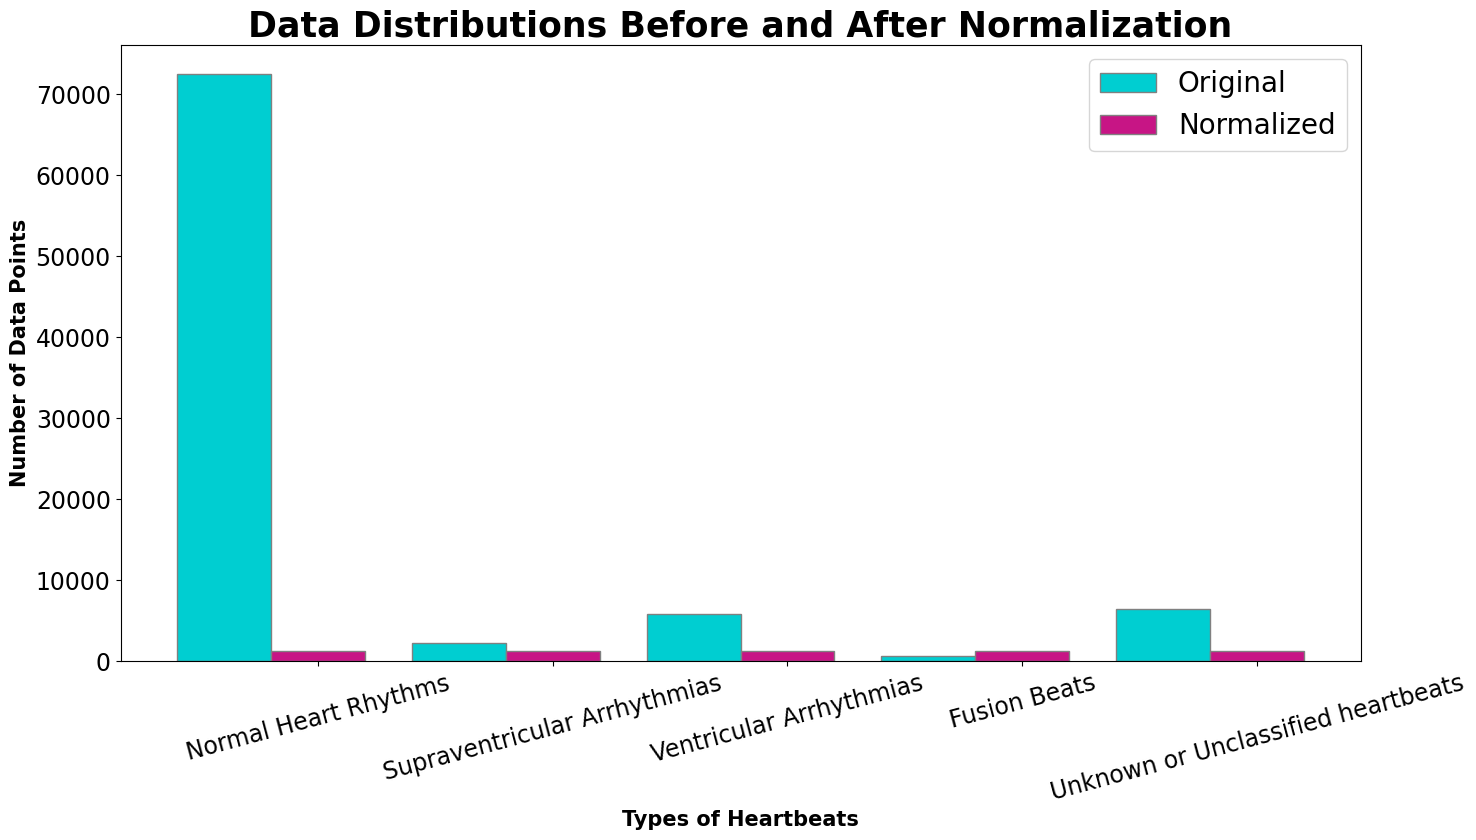

In [61]:
barWidth = 0.4
fig = plt.subplots(figsize =(16, 8))

fontsizelabel = 15
fontsizeticks = 17

Normalized_Train_Data = [72471, 2223, 5788, 641, 6431]
Original_Train_Data = [1200, 1200, 1200, 1282, 1200]

br1 = np.arange(len(Normalized_Train_Data))
br2 = [x + barWidth for x in br1]

plt.bar(br1, Normalized_Train_Data, color ='darkturquoise', width = barWidth,
        edgecolor ='grey', label ='Original')
plt.bar(br2, Original_Train_Data, color ='mediumvioletred', width = barWidth,
        edgecolor ='grey', label ='Normalized')

plt.xlabel('Types of Heartbeats', fontweight ='bold', fontsize = fontsizelabel)
plt.ylabel('Number of Data Points', fontweight ='bold', fontsize = fontsizelabel)
plt.xticks([r + barWidth for r in range(len(Normalized_Train_Data))],
        ['Normal Heart Rhythms', 'Supraventricular Arrhythmias', 'Ventricular Arrhythmias', 'Fusion Beats', 'Unknown or Unclassified heartbeats'])

plt.title("Data Distributions Before and After Normalization",fontweight ='bold', fontsize = 25)
plt.xticks(rotation = 15, fontsize = fontsizeticks)
plt.yticks(fontsize = fontsizeticks)
plt.legend(fontsize=20)
plt.show()


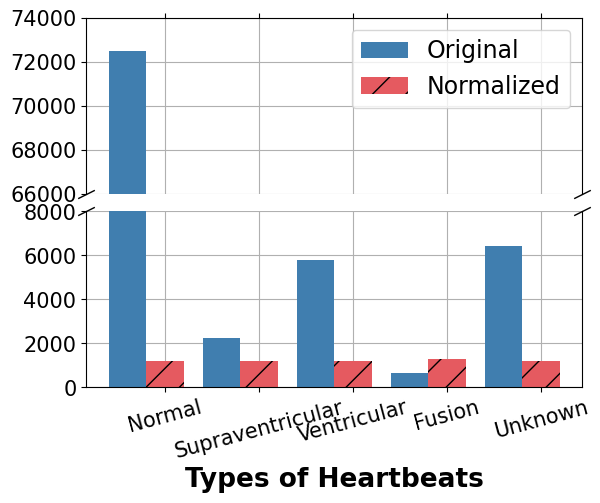

In [185]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)



plt.xlabel('Types of Heartbeats', fontweight ='bold', fontsize = 19)

fig.subplots_adjust(hspace=0.1)
ax1.bar(br1, Normalized_Train_Data, color ='#407eaf', width = barWidth, label ='Original')
ax1.bar(br2, Original_Train_Data, color ='#e55a60', width = barWidth, label ='Normalized', hatch = '/')
ax2.bar(br1, Normalized_Train_Data, color ='#407eaf', width = barWidth, label ='Original')
ax2.bar(br2, Original_Train_Data, color ='#e55a60', width = barWidth, label ='Normalized', hatch = '/')


ax1.set_ylim(66000, 74000)
ax2.set_ylim(0, 8000)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()


d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.xticks([r + barWidth for r in range(len(Normalized_Train_Data))],
        ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown'])
plt.xticks(rotation = 15)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(fontsize=17)

ax1.grid(True)
ax2.grid(True)

plt.show()

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to label
dtypes: float64(188)
memory usage: 31.4 MB


In [63]:
#df_downsampled_test = df_test.sample(n=1360, random_state=1)

### **Importing the neccesary classifiers for models**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

### **Making Models and Graphs**

In [65]:
X_train, y_train = df_train_normalized.iloc[:,:187], df_train_normalized.iloc[:,-1:]
X_test, y_test = df_test.iloc[:,:187], df_test.iloc[:,-1:]

#X_test, y_test = df_downsampled_test.iloc[:,:187], df_downsampled_test.iloc[:,-1:]

accuracy = []

#### *Logistic Regression*

In [66]:
clf = LogisticRegression(penalty='l2', tol=0.0001, max_iter=1000, random_state=1)
clf = clf.fit(X_train, y_train)
y_predicted_LR = clf.predict(X_test)
accuracyLR = accuracy_score(y_test, y_predicted_LR)
print("Accuracy:", accuracyLR)

print("Recall Score : ",recall_score(y_test, y_predicted_LR, pos_label='positive',average='macro'))


print(y_predicted_LR)
confusion_matrix_LR = confusion_matrix(y_test, y_predicted_LR, normalize='true')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6338388452402705
Recall Score :  0.7519904980155511
[0. 0. 0. ... 2. 4. 4.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


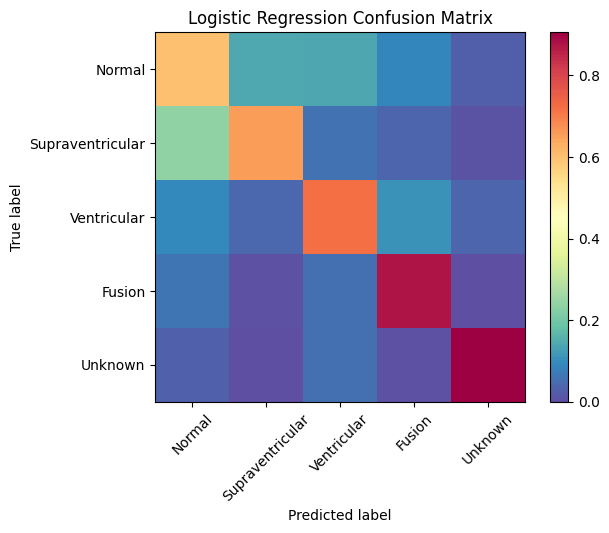

In [67]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix  = confusion_matrix_LR, display_labels = ["Normal", "Supraventricular", "Ventricular", "Fusion", "Unknown"])
cm_display.plot(include_values = False, cmap = 'Spectral_r')

plt.xticks(rotation = 45)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [68]:
accuracy.append(accuracyLR)

#### *K Nearest-Neighbors*

In [69]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)
accuracyKNN = accuracy_score(y_test, y_pred_KNN)

print("Accuracy:", accuracyKNN)

print("Recall Score : ",recall_score(y_test, y_pred_KNN,
                                           pos_label='positive',
                                           average='macro'))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.813128083318107
Recall Score :  0.8695435789763696


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


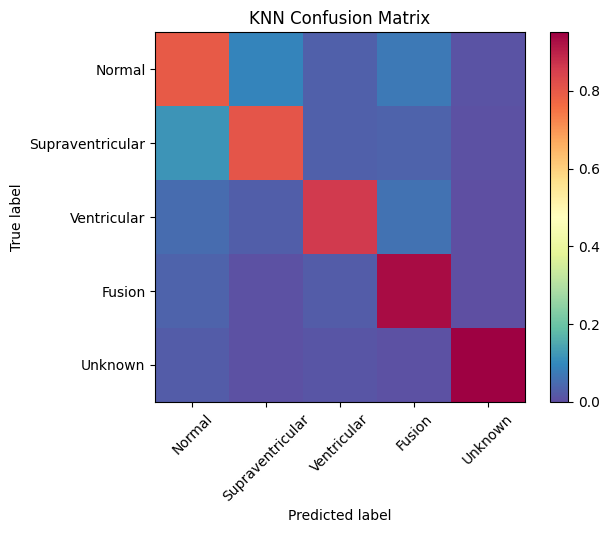

In [70]:
confusion_matrix_KNN = confusion_matrix(y_test, y_pred_KNN, normalize='true')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_KNN,
                                            display_labels = ["Normal", "Supraventricular", "Ventricular", "Fusion", "Unknown"])
cm_display.plot(cmap = 'Spectral_r', include_values = False)
plt.xticks(rotation = 45)
plt.title("KNN Confusion Matrix")
plt.show()

In [71]:
accuracy.append(accuracyKNN)

#### *Random Forest*

In [72]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_RF = rf.predict(X_test)
accuracyRF = accuracy_score(y_test, y_pred_RF)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [74]:
'''
model = RandomForestClassifier()
param_grid = {"n_estimators":[150,175], "min_samples_split":[5,10]}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=2, scoring="recall")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
'''

'\nmodel = RandomForestClassifier()\nparam_grid = {"n_estimators":[150,175], "min_samples_split":[5,10]}\ngrid_search = GridSearchCV(model, param_grid=param_grid, cv=2, scoring="recall")\ngrid_search.fit(X_train, y_train)\nprint(grid_search.best_params_)\nprint(grid_search.best_score_)\n'

In [75]:
model = RandomForestClassifier(n_estimators = 150, min_samples_split=5, random_state=1, bootstrap=False)
model.fit(X_train, y_train)


y_pred_RF =  model.predict(X_test)
accuracyRF = accuracy_score(y_test, y_pred_RF)


print("Accuracy:", accuracyRF)

print("Recall Score : ",recall_score(y_test, y_pred_RF,
                                           pos_label='positive',
                                           average='macro'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9120226566782387
Recall Score :  0.9028101631233939


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [76]:
accuracy.append(accuracyRF)

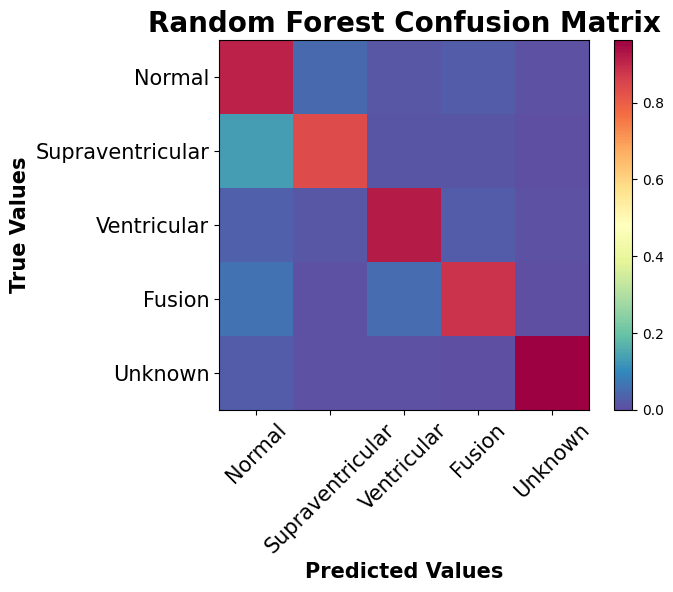

In [104]:
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF, normalize='true')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix  = confusion_matrix_RF,
                                            display_labels = ["Normal", "Supraventricular", "Ventricular", "Fusion", "Unknown"])
cm_display.plot(include_values = False, cmap = 'Spectral_r')
plt.xticks(rotation = 45, fontsize = 15)
plt.xlabel('Predicted Values', fontsize = 15, fontweight = 'bold')
plt.ylabel('True Values', fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15)
plt.title("Random Forest Confusion Matrix", fontsize = 20, fontweight = 'bold')
plt.show()

#### *ADA Boosting*

In [78]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_ADA = model.predict(X_test)

accuracyADA = metrics.accuracy_score(y_test, y_pred_ADA)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracyADA)

print("Recall Score : ",recall_score(y_test, y_pred_ADA,
                                           pos_label='positive',
                                           average='macro'))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.4166362141421524
Recall Score :  0.6618071766537754


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [79]:
accuracy.append(accuracyADA)

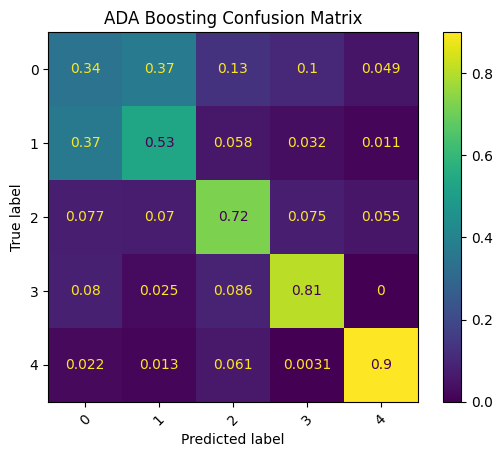

In [80]:
confusion_matrix_ADA = confusion_matrix(y_test, y_pred_ADA, normalize='true')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix  = confusion_matrix_ADA, display_labels = [0, 1, 2, 3, 4])
cm_display.plot()
plt.xticks(rotation = 45)
plt.title("ADA Boosting Confusion Matrix")
plt.show()

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier(max_leaf_nodes=8)
n_estimators = 300

adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,
).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
def misclassification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)


weak_learners_misclassification_error = misclassification_error(
    y_test, weak_learner.fit(X_train, y_train).predict(X_test))


print(
    "DecisionTreeClassifier's misclassification_error: "
    f"{weak_learners_misclassification_error:.3f}"
)

DecisionTreeClassifier's misclassification_error: 0.402


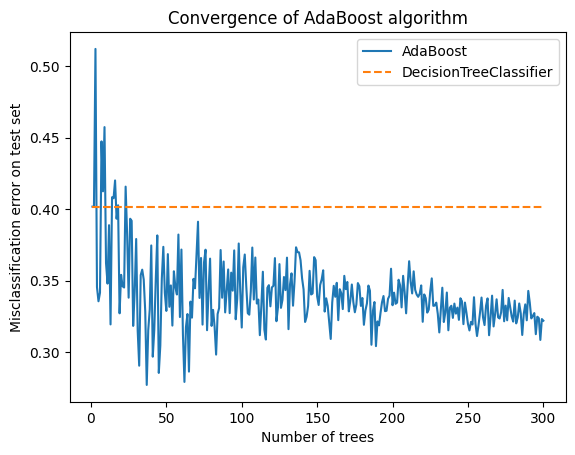

In [83]:
boosting_errors = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "AdaBoost": [
            misclassification_error(y_test, y_pred)
            for y_pred in adaboost_clf.staged_predict(X_test)
        ],
    }
).set_index("Number of trees")
ax = boosting_errors.plot()
ax.set_ylabel("Misclassification error on test set")
ax.set_title("Convergence of AdaBoost algorithm")
plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [weak_learners_misclassification_error, weak_learners_misclassification_error],
    color="tab:orange",
    linestyle="dashed",
)
plt.legend(["AdaBoost", "DecisionTreeClassifier"], loc=1)
plt.show()

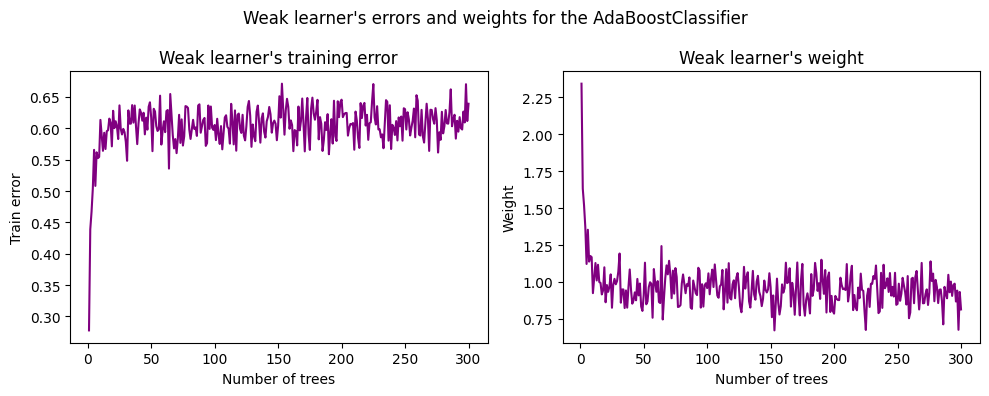

In [84]:
weak_learners_info = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "Errors": adaboost_clf.estimator_errors_,
        "Weights": adaboost_clf.estimator_weights_,
    }
).set_index("Number of trees")

axs = weak_learners_info.plot(
    subplots=True, layout=(1, 2), figsize=(10, 4), legend=False, color="purple"
)
axs[0, 0].set_ylabel("Train error")
axs[0, 0].set_title("Weak learner's training error")
axs[0, 1].set_ylabel("Weight")
axs[0, 1].set_title("Weak learner's weight")
fig = axs[0, 0].get_figure()
fig.suptitle("Weak learner's errors and weights for the AdaBoostClassifier")
fig.tight_layout()

#### *XGBoost*

In [85]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_XGB = model.predict(X_test)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print("Accuracy: %.2f%%" % (accuracy_XGB * 100.0))

Accuracy: 90.17%


In [86]:
accuracy.append(accuracy_XGB)

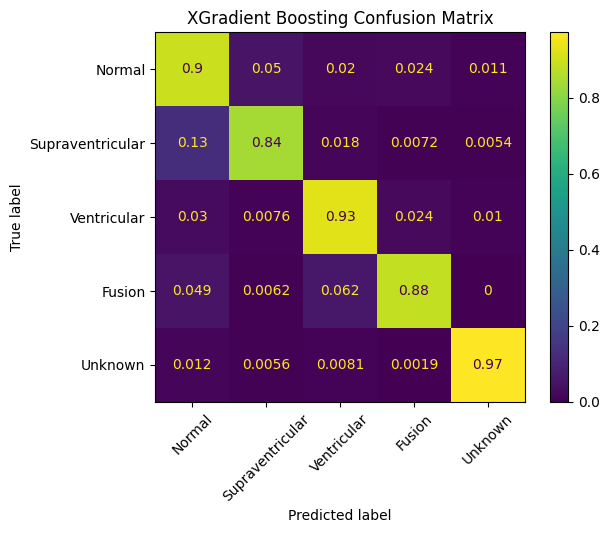

In [87]:
confusion_matrix_XGBoost = confusion_matrix(y_test, y_pred_XGB, normalize='true')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix  = confusion_matrix_XGBoost,
                                            display_labels = ["Normal", "Supraventricular", "Ventricular", "Fusion", "Unknown"])
cm_display.plot()
plt.xticks(rotation = 45)
plt.title("XGradient Boosting Confusion Matrix")
plt.show()

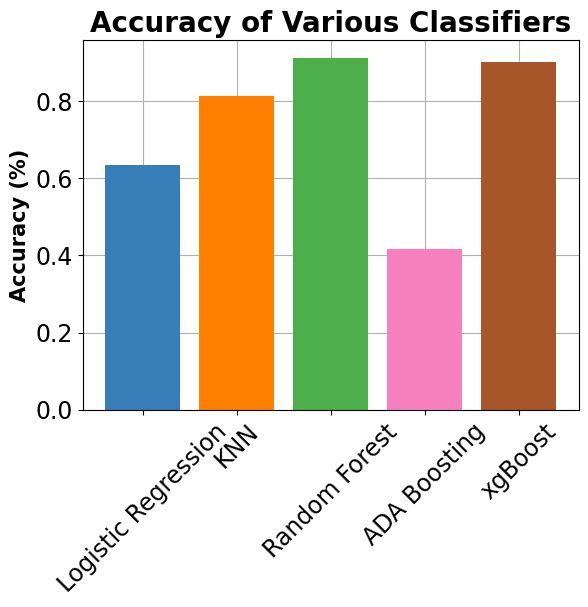

In [98]:
names = ['Logistic Regression', 'KNN' , 'Random Forest', 'ADA Boosting', 'xgBoost']
plt.rc('axes', axisbelow=True)
fig, ax = plt.subplots()
ax.grid(True)

# bar_labels = ['red', 'blue', 'yellow', 'orange']
bar_colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']

# ax.bar(names, floatScores, label=bar_labels, color=bar_colors, bottom=base)
ax.bar(names, accuracy, color=bar_colors)

ax.set_ylabel('Accuracy (%)', fontsize = 15, fontweight = 'bold')
ax.set_title('Accuracy of Various Classifiers',fontsize = 20, fontweight = 'bold')
plt.xticks(rotation = 45, fontsize = 8)
# ax.legend(title='color')

plt.xticks(fontsize = fontsizeticks)
plt.yticks(fontsize = fontsizeticks)
plt.show()

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 1.85


In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [ ]:
params['eval_metric'] = "mae"
num_boost_round = 999

In [ ]:
model = xgb.train(params, dtrain, num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10)

print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:56:26] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	Test-mae:1.52041
[1]	Test-mae:1.30724
[2]	Test-mae:1.13373
[3]	Test-mae:0.99219
[4]	Test-mae:0.89884
[5]	Test-mae:0.83239
[6]	Test-mae:0.77641
[7]	Test-mae:0.72257
[8]	Test-mae:0.68661
[9]	Test-mae:0.65518
[10]	Test-mae:0.63992
[11]	Test-mae:0.63412
[12]	Test-mae:0.62313
[13]	Test-mae:0.61151
[14]	Test-mae:0.60592
[15]	Test-mae:0.60113
[16]	Test-mae:0.59587
[17]	Test-mae:0.58773
[18]	Test-mae:0.58447
[19]	Test-mae:0.57658
[20]	Test-mae:0.57032
[21]	Test-mae:0.56900
[22]	Test-mae:0.56376
[23]	Test-mae:0.56166
[24]	Test-mae:0.56055
[25]	Test-mae:0.55919
[26]	Test-mae:0.55454
[27]	Test-mae:0.55310
[28]	Test-mae:0.55141
[29]	Test-mae:0.55048
[30]	Test-mae:0.54945
[31]	Test-mae:0.54900
[32]	Test-mae:0.54887
[33]	Test-mae:0.54863
[34]	Test-mae:0.54746
[35]	Test-mae:0.54603
[36]	Test-mae:0.54383
[37]	Test-mae:0.54191
[38]	Test-mae:0.54105
[39]	Test-mae:0.54029
[40]	Test-mae:0.53867
[41]	Test-mae:0.53805
[42]	Test-mae:0.53769
[43]	Test-mae:0.53678
[44]	Test-mae:0.53639
[45]	Test-mae:0.5339

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:57:49] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:57:50] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:57:51] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:57:52] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.946599,0.007236,0.964425,0.017419
1,0.755635,0.002115,0.787830,0.019254
2,0.616345,0.006292,0.662520,0.021680
3,0.517269,0.008452,0.574525,0.022752
4,0.441753,0.012089,0.508436,0.024754
...,...,...,...,...
571,0.000662,0.000025,0.276013,0.015393
572,0.000660,0.000022,0.276012,0.015392
573,0.000659,0.000020,0.276012,0.015391
574,0.000658,0.000017,0.276011,0.015389


In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
'''
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
'''
#Best params: 10, 5, MAE: 0.2554053891912446

CV with max_depth=9, min_child_weight=5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:01:31] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:01:32] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:01:33] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.2633316728653405 for 272 rounds
CV with max_depth=9, min_child_weight=6


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:03:56] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:03:57] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:03:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.26329902882390077 for 298 rounds
CV with max_depth=9, min_child_weight=7


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:06:23] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:06:24] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:06:25] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.26130344615811696 for 301 rounds
CV with max_depth=10, min_child_weight=5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:08:50] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:08:51] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.2554053891912446 for 223 rounds
CV with max_depth=10, min_child_weight=6


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:11:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:11:15] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.25935059567269986 for 245 rounds
CV with max_depth=10, min_child_weight=7


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:13:38] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:13:39] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.2590905647905632 for 264 rounds
CV with max_depth=11, min_child_weight=5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:16:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:16:05] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:16:06] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.2585928566091329 for 187 rounds
CV with max_depth=11, min_child_weight=6


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:18:28] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:18:29] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:18:30] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.2619554176044176 for 202 rounds
CV with max_depth=11, min_child_weight=7


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:50] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:51] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:52] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:54] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.26105176970327315 for 222 rounds
Best params: 10, 5, MAE: 0.2554053891912446


##### Best params: 10, 5, MAE: 0.2554053891912446

In [ ]:
params['max_depth'] = 10
params['min_child_weight'] = 5

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:28:25] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:28:26] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:28:28] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:28:30] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

	MAE 0.2554053891912446 for 223 rounds
CV with subsample=1.0, colsample=0.9


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:31:08] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:31:09] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:31:11] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:31:12] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.25958077630793436 for 218 rounds
CV with subsample=1.0, colsample=0.8


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:33:33] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:33:34] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.25971866017643114 for 224 rounds
CV with subsample=1.0, colsample=0.7


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:35:40] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:35:41] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.25653052245144387 for 229 rounds
CV with subsample=0.9, colsample=1.0


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:37:36] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:37:37] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.26183352888163836 for 252 rounds
CV with subsample=0.9, colsample=0.9


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:40:18] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:40:19] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.26415830107786975 for 270 rounds
CV with subsample=0.9, colsample=0.8


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:42:51] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:42:53] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:42:54] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:42:55] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

	MAE 0.2646528852786885 for 297 rounds
CV with subsample=0.9, colsample=0.7


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:45:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:45:18] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.26006837507571784 for 320 rounds
CV with subsample=0.8, colsample=1.0


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:47:38] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:47:39] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.26633508061006783 for 312 rounds
CV with subsample=0.8, colsample=0.9


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:50:35] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:50:36] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.27120997835232946 for 314 rounds
CV with subsample=0.8, colsample=0.8


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:53:16] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:53:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.27254865089451996 for 332 rounds
CV with subsample=0.8, colsample=0.7


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:55:50] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:55:51] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.26888006663754077 for 320 rounds
CV with subsample=0.7, colsample=1.0


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:58:09] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:58:10] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.2741627695504899 for 432 rounds
CV with subsample=0.7, colsample=0.9


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:01:24] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:01:25] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:01:26] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.27527754679309685 for 305 rounds
CV with subsample=0.7, colsample=0.8


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:04:26] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:04:27] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:04:28] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.27101888566854815 for 310 rounds
CV with subsample=0.7, colsample=0.7


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:07:12] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:07:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.2769029226433314 for 313 rounds
Best params: 1.0, 1.0, MAE: 0.2554053891912446


###### Best params: 1.0, 1.0, MAE: 0.2554053891912446

In [ ]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [ ]:
%time
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time
    cv_results = xgb.cv(params,
                              dtrain,
                              num_boost_round=num_boost_round,
                              seed=42,
                              nfold=5,
                              metrics=['mae'],
                              early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.63 µs
CV with eta=0.3
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:17:06] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:17:07] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:17:08] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:17:10] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

	MAE 0.2769029226433314 for 313 rounds

CV with eta=0.2
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 7.39 µs


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:19:50] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:19:51] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.2593790071116781 for 472 rounds

CV with eta=0.1
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:23:25] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:23:26] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:23:27] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.24181682480564967 for 837 rounds

CV with eta=0.05
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:30:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:30:18] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.2284068952043651 for 998 rounds

CV with eta=0.01
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:39:43] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:39:44] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:39:45] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.23967129370209314 for 998 rounds

CV with eta=0.005
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:49:44] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:49:45] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:49:46] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 0.25801445335765305 for 998 rounds

Best params: 0.05, MAE: 0.2284068952043651


##### Best params: 0.05, MAE: 0.2284068952043651

In [ ]:
params['eta'] = .05

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:07:16] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	Test-mae:1.84006
[1]	Test-mae:1.83409
[2]	Test-mae:1.82805
[3]	Test-mae:1.82207
[4]	Test-mae:1.81649
[5]	Test-mae:1.81060
[6]	Test-mae:1.80471
[7]	Test-mae:1.79897
[8]	Test-mae:1.79302
[9]	Test-mae:1.78716
[10]	Test-mae:1.78140
[11]	Test-mae:1.77585
[12]	Test-mae:1.77002
[13]	Test-mae:1.76443
[14]	Test-mae:1.75887
[15]	Test-mae:1.75322
[16]	Test-mae:1.74757
[17]	Test-mae:1.74216
[18]	Test-mae:1.73648
[19]	Test-mae:1.73096
[20]	Test-mae:1.72534
[21]	Test-mae:1.71999
[22]	Test-mae:1.71458
[23]	Test-mae:1.70915
[24]	Test-mae:1.70377
[25]	Test-mae:1.69846
[26]	Test-mae:1.69297
[27]	Test-mae:1.68739
[28]	Test-mae:1.68213
[29]	Test-mae:1.67691
[30]	Test-mae:1.67153
[31]	Test-mae:1.66625
[32]	Test-mae:1.66100
[33]	Test-mae:1.65587
[34]	Test-mae:1.65078
[35]	Test-mae:1.64570
[36]	Test-mae:1.64057
[37]	Test-mae:1.63536
[38]	Test-mae:1.63027
[39]	Test-mae:1.62509
[40]	Test-mae:1.61996
[41]	Test-mae:1.61490
[42]	Test-mae:1.60964
[43]	Test-mae:1.60465
[44]	Test-mae:1.59995
[45]	Test-mae:1.5951

###### Best MAE: 0.48 in 999 rounds

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-mae:1.78090
[1]	Test-mae:1.71980
[2]	Test-mae:1.66149
[3]	Test-mae:1.60553
[4]	Test-mae:1.55245
[5]	Test-mae:1.50231
[6]	Test-mae:1.45513
[7]	Test-mae:1.40979
[8]	Test-mae:1.36594
[9]	Test-mae:1.32405
[10]	Test-mae:1.28574
[11]	Test-mae:1.24842
[12]	Test-mae:1.21227
[13]	Test-mae:1.17828
[14]	Test-mae:1.14672
[15]	Test-mae:1.11523
[16]	Test-mae:1.08528
[17]	Test-mae:1.05711
[18]	Test-mae:1.02990
[19]	Test-mae:1.00370
[20]	Test-mae:0.98012
[21]	Test-mae:0.95655
[22]	Test-mae:0.93514
[23]	Test-mae:0.91377
[24]	Test-mae:0.89329
[25]	Test-mae:0.87366
[26]	Test-mae:0.85494
[27]	Test-mae:0.83732
[28]	Test-mae:0.82029
[29]	Test-mae:0.80352
[30]	Test-mae:0.78796
[31]	Test-mae:0.77325
[32]	Test-mae:0.75898
[33]	Test-mae:0.74626
[34]	Test-mae:0.73402
[35]	Test-mae:0.72217
[36]	Test-mae:0.71023
[37]	Test-mae:0.69899
[38]	Test-mae:0.68842
[39]	Test-mae:0.67849
[40]	Test-mae:0.66840
[41]	Test-mae:0.65886
[42]	Test-mae:0.65000
[43]	Test-mae:0.64193
[44]	Test-mae:0.63458
[45]	Test-mae:0.6273

In [ ]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.4762251904627389

In [ ]:
params

{'max_depth': 10,
 'min_child_weight': 5,
 'eta': 0.05,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'reg:squarederror',
 'eval_metric': 'mae'}

In [ ]:
model = XGBClassifier(max_depth= 10, min_child_weight= 5,eta= 0.05,subsample= 1,colsample_bytree= 1,objective = 'reg:squarederror',
 eval_metric = 'mae')
model.fit(X_train, y_train)
y_pred_XGB = model.predict(X_test)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print("Accuracy: %.2f%%" % (accuracy_XGB * 100.0))

Accuracy: 87.92%
